# **1- Loading,and preprocessing the data**

In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# loading data
df = pd.read_csv('primary-tumor.data')
columns = ['Class', 'Age', 'Sex', 'Histologic-type', 'Degree-of-diff', 'Bone', 'Bone-marrow', 'Lung', 'Pleura', 'Peritoneum', 'Liver', 'Brain', 'Skin', 'Neck', 'Supraclavicular', 'Axillar', ' Mediastinum', 'Abdominal']
df = pd.read_csv('primary-tumor.data', names=columns)

# Cleaning data and missing values
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric)

In [ ]:
print(df.head(5))

   Class  Age  Sex  Histologic-type  Degree-of-diff  Bone  Bone-marrow  Lung  \
0      1    1    1                2               3     2            2     1   
1      1    1    1                2               3     2            2     2   
2      1    1    2                2               3     1            2     2   
3      1    1    2                2               3     1            2     1   
4      1    1    2                2               3     1            2     1   

   Pleura  Peritoneum  Liver  Brain  Skin  Neck  Supraclavicular  Axillar  \
0       2           2      2      2     2     2                2        2   
1       2           2      1      2     2     2                1        2   
2       2           2      2      2     2     2                2        2   
3       1           2      2      2     2     2                2        2   
4       1           2      2      2     2     2                2        2   

    Mediastinum  Abdominal  
0             2          2 

##2- Training the model

In [ ]:
# Create a list for store results
results = []

# Combining features
combinations = list(itertools.combinations(df.columns[1:], 2))

# Iteration with combinations
for combo in combinations:
    features = list(combo)
    X_subset = df[features]

    # training the logistic regression model
    model = LogisticRegression()
    model.fit(X_subset, df['Class'])

    # Prediction accuracy score
    y_pred = model.predict(X_subset)
    accuracy = accuracy_score(df['Class'], y_pred)

    # Add results for the list
    results.append([features[0], features[1], accuracy])

# Create a dataframe with results
results_df = pd.DataFrame(results, columns=['X', 'Y (label)', 'Accuracy'])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **3-creating tables**

In [ ]:
# Create a list to store the results
results = []

# Get all column names
feature_columns = df.columns[1:]

# Combine all features (including using the same feature for X and Y)
combinations = list(itertools.product(feature_columns, repeat=2))

# Iterate over each combination
for combo in combinations:
    features = list(combo)
    X_subset = df[[features[0]]]  # X is a DataFrame with only one feature
    y_subset = df[features[1]]  # y is a Series with one feature

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_subset, y_subset)

    # Predict and calculate accuracy
    y_pred = model.predict(X_subset)
    accuracy = accuracy_score(y_subset, y_pred)

    # Add the results to the list
    results.append([features[0], features[1], accuracy])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['X', 'Y (label)', 'Accuracy'])

# Display the DataFrame
print(results_df)


             X        Y (label)  Accuracy
0          Age              Age  1.000000
1          Age              Sex  0.530303
2          Age  Histologic-type  0.712121
3          Age  Degree-of-diffe  0.439394
4          Age             Bone  0.734848
..         ...              ...       ...
284  Abdominal             Neck  0.810606
285  Abdominal  Supraclavicular  0.803030
286  Abdominal          Axillar  0.916667
287  Abdominal      Mediastinum  0.765152
288  Abdominal        Abdominal  1.000000

[289 rows x 3 columns]


In [ ]:
# handling with the results to have exactly 306 rows
results = results[:306]

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['X', 'Y (label)', 'Accuracy'])

# Display the DataFrame
print(results_df)


                   X        Y (label)  Accuracy
0                Age              Sex  0.530303
1                Sex              Age  0.530303
2                Age  Histologic-type  0.712121
3    Histologic-type              Age  0.712121
4                Age  Degree-of-diffe  0.439394
..               ...              ...       ...
301      Mediastinum              Age  0.765152
302              Age        Abdominal  0.742424
303        Abdominal              Age  0.742424
304              Sex  Histologic-type  0.712121
305  Histologic-type              Sex  0.712121

[306 rows x 3 columns]


# **4-plotting the confusion matrix**

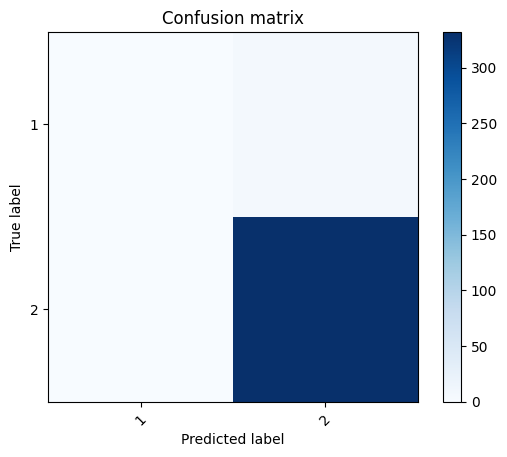

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


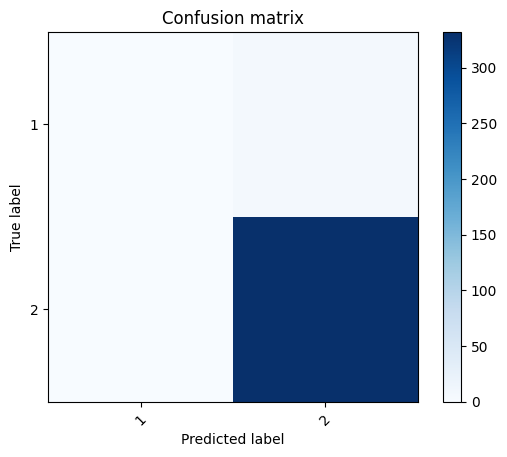

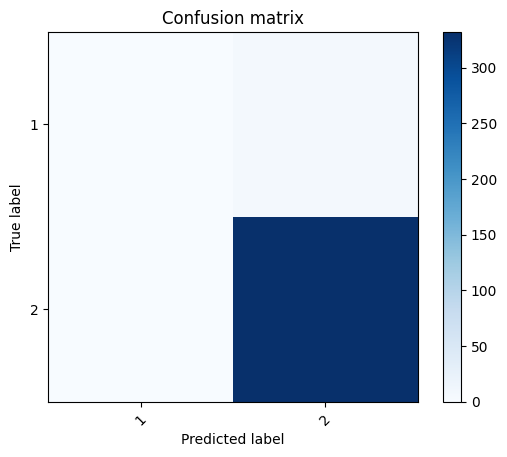

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


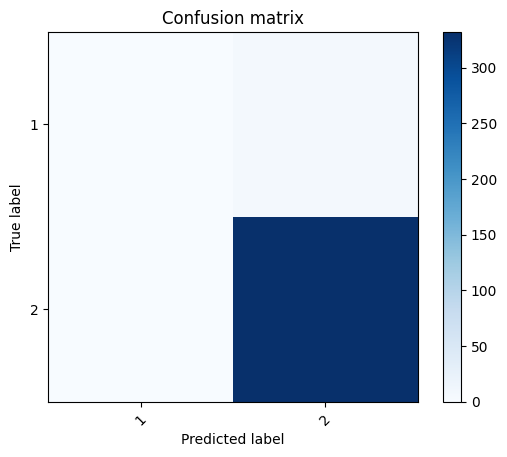

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


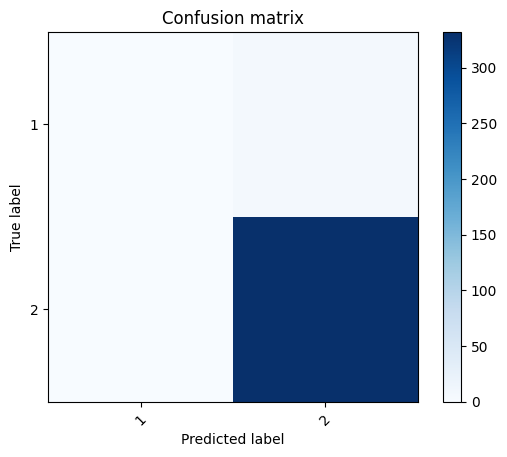

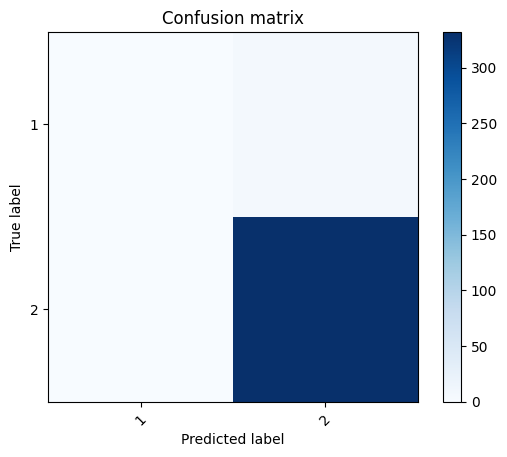

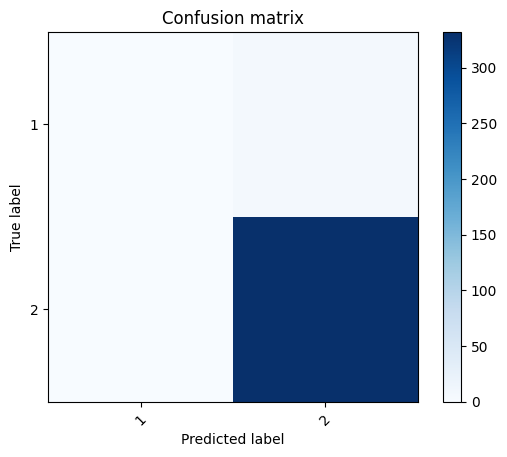

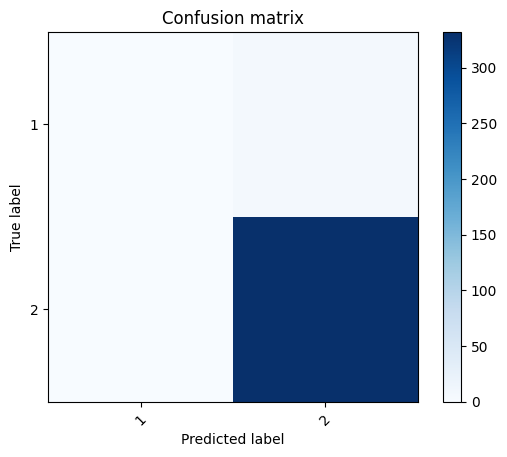

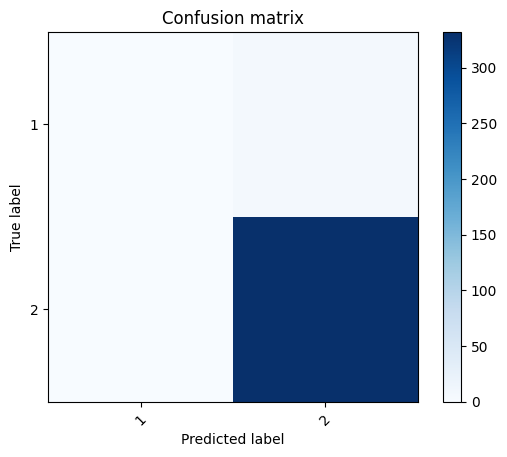

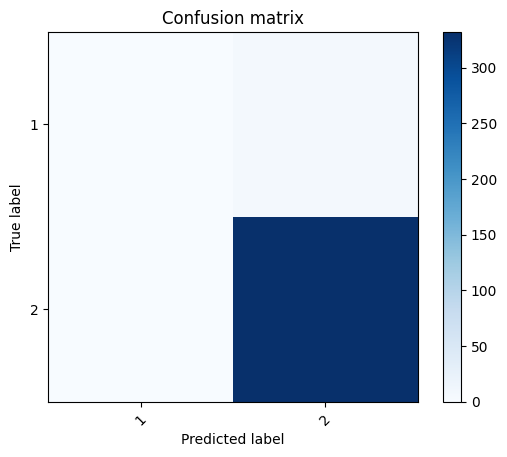

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


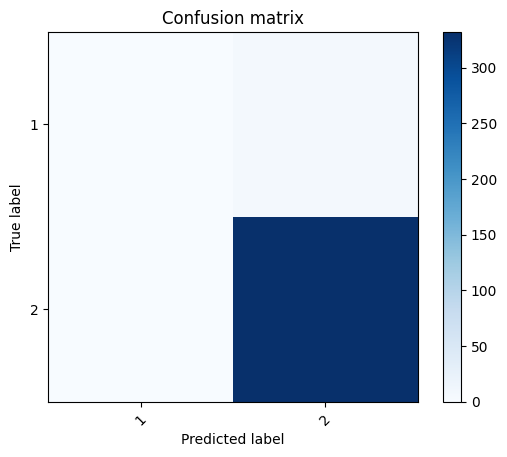

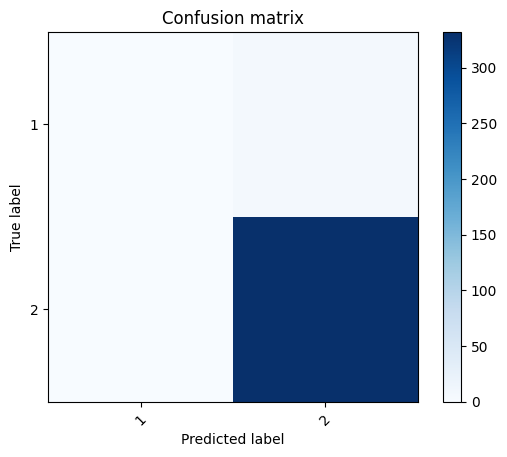

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


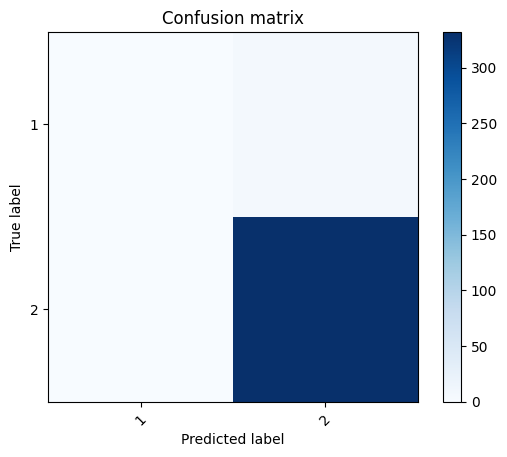

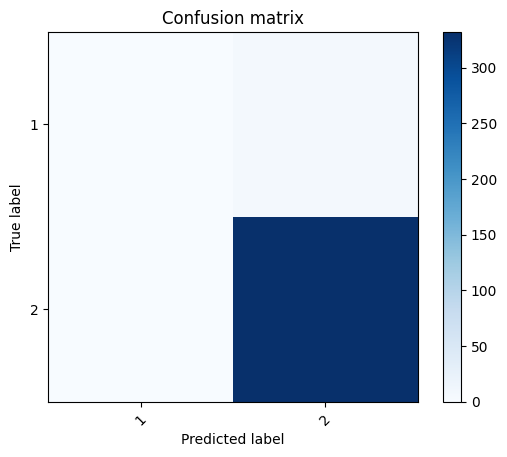

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


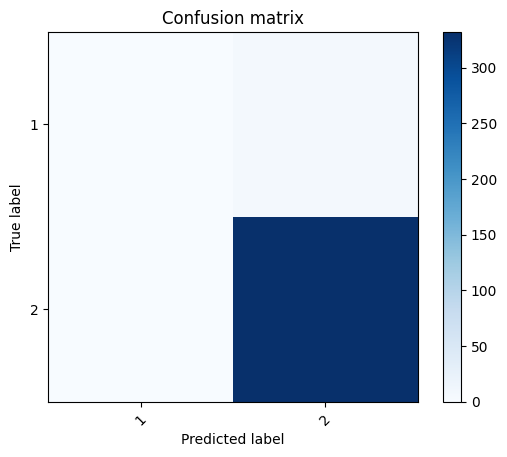

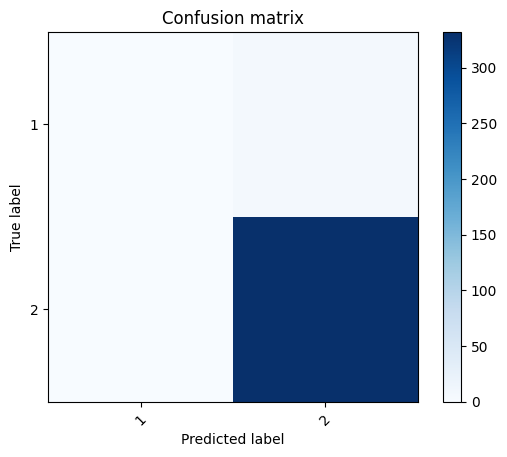

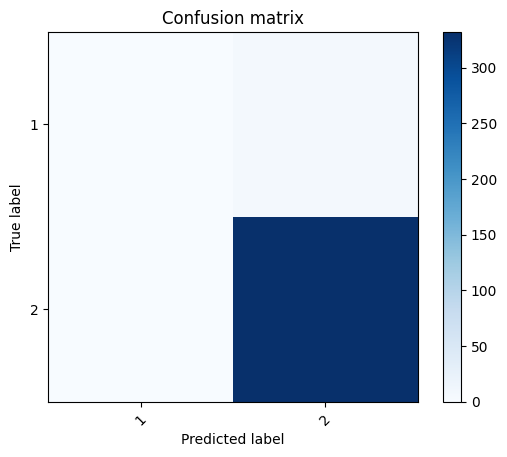

             X        Y (label)  Accuracy
0        Class              Age  0.616519
1        Class              Sex  0.634218
2        Class  Histologic-type  0.846608
3        Class   Degree-of-diff  0.752212
4        Class             Bone  0.722714
..         ...              ...       ...
301  Abdominal             Skin  0.941003
302  Abdominal             Neck  0.870206
303  Abdominal  Supraclavicular  0.820059
304  Abdominal          Axillar  0.902655
305  Abdominal      Mediastinum  0.728614

[306 rows x 3 columns]


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
# Create a list to store the results
results = []

# Get all column names
feature_columns = df.columns

# Combine all features (including using the same feature for X and Y)
combinations = list(itertools.product(feature_columns, repeat=2))

# Iterate over each combination
for combo in combinations:
    features = list(combo)
    if features[0] == features[1]: continue
    X_subset = df[[features[0]]]  # X is a DataFrame with only one feature
    y_subset = df[features[1]]  # y is a Series with one feature

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_subset, y_subset)

    # Predict and calculate accuracy
    y_pred = model.predict(X_subset)
    accuracy = accuracy_score(y_subset, y_pred)
    if accuracy > .979:
    # Calculate the confusion matrix
      cm = confusion_matrix(y_subset, y_pred)

      # Plotting the confusion matrix
      plt.figure()
      plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
      plt.title('Confusion matrix')
      plt.colorbar()
      classes = model.classes_
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)
      plt.xlabel('Predicted label')
      plt.ylabel('True label')
      plt.show()

    # Add the results to the list
    results.append([features[0], features[1], accuracy])

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['X', 'Y (label)', 'Accuracy'])

# Display the DataFrame
print(results_df)

# **5- model accuracy score**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#dealing with missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creating decision trees parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# testing the model
y_pred = clf.predict(X_test_imputed)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# getting the score , and adjusting the tree for avoid overfitting
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("highest accuracy:", accuracy)

accuracy: 1.0
highest accuracy: 1.0


In [ ]:
#Obtaining the 5 most accurare values
results_df.sort_values(by=['Accuracy'],ascending=False)

,X,Y (label),Accuracy
159,Peritoneum,Bone-marrow,0.979351
176,Liver,Bone-marrow,0.979351
227,Neck,Bone-marrow,0.979351
56,Histologic-type,Bone-marrow,0.979351
39,Sex,Bone-marrow,0.979351
...,...,...,...
102,Bone-marrow,Class,0.247788
289,Abdominal,Class,0.247788
136,Pleura,Class,0.247788
272,Mediastinum,Class,0.247788


In [ ]:
if accuracy >= 0.70:
    print(' is accurate.')
else:
    print('is not accurate.')

 is accurate.
